## Load the data, and get a overview of the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import the data that I have scraped from the website Seek.com
df_jobs = pd.read_csv('./data/Data_jobs_full_version.csv')
df_jobs.head()

,Unnamed: 0,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,salary,subclassification,recruiter_rating,description
0,40771115,40771115,Python Expert,Atlastix,19 Jan 2020,Melbourne,Contract/Temp,Science & Technology,CBD & Inner Suburbs,NaN,"Mathematics, Statistics & Information Sciences",NaN,Are you a gun coder with a deep appreciation o...
1,40855053,40855053,Operations Command Center Engineer T2 - Data,The Vocus Group,31 Jan 2020,Melbourne,Full Time,Information & Communication Technology,CBD & Inner Suburbs,NaN,Telecommunications,2.8,"Do you love technology, network operations an..."
2,40925581,40925581,Data Engineer,The Onset,10 Feb 2020,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs","$170,000 + Super + Bonus",Engineering - Software,NaN,It's your call whether to garner support from ...
3,40925535,40925535,Data Engineer,Allura Partners,10 Feb 2020,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",NaN,Database Development & Administration,NaN,"As a Junior Data Scientist, you will focus on ..."
4,40924597,40924597,Data Engineer,Precision Sourcing,10 Feb 2020,Sydney,Full Time,Information & Communication Technology,NaN,$110k - $120k p.a.,Developers/Programmers,NaN,About the business This is an amazing time to...


In [3]:
# Drop the column 'Unnamed: 0', this is the duplicate of 'job_id'
df_jobs.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df_jobs.tail()

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,salary,subclassification,recruiter_rating,description
7813,40787589,General Hands - Warehouse & Manufacturing,EGR Group,21 Jan 2020,Brisbane,Full Time,"Manufacturing, Transport & Logistics",CBD & Inner Suburbs,NaN,"Warehousing, Storage & Distribution",2.9,EGR is one of Queensland's largest manufacturi...
7814,40814074,Finance Systems Project Manager,Fernway Partners,24 Jan 2020,Sydney,Contract/Temp,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",C.$800.00 pd Neg on Exp,Product Management & Development,NaN,Manage and deliver a portfolio of IT/Business ...
7815,40722891,Accounts / Administration Officer,ANL Lighting,7 Feb 2020,Melbourne,Full Time,Administration & Office Support,Eastern Suburbs,NaN,Administrative Assistants,NaN,ANL Lighting has a 30-year history of supplyin...
7816,40735321,Inside Sales Specialist,Appstablishment Software Development Pty Ltd,14 Jan 2020,Perth,Full Time,Sales,"CBD, Inner & Western Suburbs",NaN,Sales Representatives/Consultants,NaN,About the business With Perth and Sydney CBD...
7817,40727263,Bookkeeper and Sales Support,Quikcote Victoria,14 Jan 2020,Melbourne,Full Time,Accounting,Northern Suburbs,NaN,Bookkeeping & Small Practice Accounting,NaN,Quikcote Victoria plaster technologies. About ...


In [5]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 12 columns):
job_id               7818 non-null int64
job_title            7818 non-null object
recruiter            7818 non-null object
posted_date          7818 non-null object
city                 7818 non-null object
job_type             7818 non-null object
classification       7818 non-null object
suburb               5361 non-null object
salary               2596 non-null object
subclassification    7818 non-null object
recruiter_rating     2641 non-null float64
description          7818 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 733.1+ KB


In [6]:
# Check the number of unique values for each column
for col in df_jobs.columns:
    print(col, ':', len(df_jobs[col].unique()))

job_id : 7818
job_title : 5482
recruiter : 2654
posted_date : 41
city : 62
job_type : 4
classification : 29
suburb : 25
salary : 1807
subclassification : 265
recruiter_rating : 33
description : 7102


## Data Cleaning

In [7]:
# I identify the following jobs to clean the data:
# 1. 'posted_date': convert to numeric values
# 2. 'city': pick top 10 cities, drop the others
# 3. 'salary': convert to numeric values
# 4. 'job_title': Use NLP Tokenization to turn it into features
# 5. 'recruiter': classify the values into two different types - 'Agent' and 'Coporate'
# 6. 'recruiter_rating': convert to numeric values
# 7. 'description': Use NLP Tokenization to turn it into features

### 1. 'posted_date'

In [8]:
# Turn the data of this column from object type to timestamp type
df_jobs['posted_date'] = pd.to_datetime(df_jobs['posted_date'])
df_jobs['posted_date'][0:5]

0   2020-01-19
1   2020-01-31
2   2020-02-10
3   2020-02-10
4   2020-02-10
Name: posted_date, dtype: datetime64[ns]

### 2. 'city'

In [9]:
# Check why I got 62 cities in the column 'city'
df_jobs['city'].unique()

array(['Melbourne', 'Sydney', 'Adelaide', 'Brisbane', 'Perth', 'ACT',
       'Launceston & North East', 'Sunshine Coast',
       'Newcastle, Maitland & Hunter', 'Gold Coast',
       'Wollongong, Illawarra & South Coast', 'Hobart',
       'Alice Springs & Central Australia', 'Rest of the UK',
       'Middle East & Africa', 'South West Coast VIC',
       'Dubbo & Central NSW', 'Asia Pacific', 'Mackay & Coalfields',
       'Port Hedland, Karratha & Pilbara', 'Darwin', 'Cairns & Far North',
       'Western QLD', 'London', 'Northern QLD', 'Richmond & Hawkesbury',
       'Toowoomba & Darling Downs', 'Gosford & Central Coast',
       'Coober Pedy & Outback SA', 'Rockhampton & Capricorn Coast',
       'Tamworth & North West NSW', 'Gladstone & Central QLD',
       'Port Macquarie & Mid North Coast', 'Far West & North Central NSW',
       'Blue Mountains & Central West', 'Mandurah & Peel',
       'Katherine & Northern Australia',
       'Kalgoorlie, Goldfields & Esperance', 'Americas',
       'B

In [10]:
# Check how many entries are there in this dataset for each city
df_jobs['city'].value_counts()

Sydney                             3173
Melbourne                          1795
Brisbane                            918
Perth                               622
ACT                                 445
                                   ... 
Coober Pedy & Outback SA              1
Rest of the UK                        1
Southern Highlands & Tablelands       1
Devonport & North West                1
Launceston & North East               1
Name: city, Length: 62, dtype: int64

In [11]:
# Get the top 10 cities in the job postings
df_jobs['city'].value_counts().sort_values(ascending=False).head(10)

Sydney                                 3173
Melbourne                              1795
Brisbane                                918
Perth                                   622
ACT                                     445
Adelaide                                243
Newcastle, Maitland & Hunter             77
Gold Coast                               52
Mackay & Coalfields                      33
Wollongong, Illawarra & South Coast      30
Name: city, dtype: int64

In [12]:
# Check the proportion of job postings that related to top 10 cities
top_10_cities_postings = df_jobs['city'].value_counts().sort_values(ascending=False).head(10).sum()
total_postings = df_jobs['job_id'].value_counts().sum()
print('percentage of job postings related to top 10 cities:', top_10_cities_postings / total_postings*100)

percentage of job postings related to top 10 cities: 94.49987209004861


In [13]:
# 94.5% of the job vacancies are in the top 10 cities. Only small part of the job vacancies(5.5%) spread over the 
# other 52 cities. I will group the other cities into 'Other' category. This should help prevent overfit the model 
# at later stage.

# Get a list of top 10 cities
top_10_cities = list(df_jobs['city'].value_counts().sort_values(ascending=False).head(10).index)

# Replace the values with 'Other' if the value is not in the top_10_cities list
df_jobs.loc[~df_jobs['city'].isin(top_10_cities), 'city'] = 'Other'

In [14]:
# Check the values of 'city' column after the replacement
df_jobs['city'].unique()

array(['Melbourne', 'Sydney', 'Adelaide', 'Brisbane', 'Perth', 'ACT',
       'Other', 'Newcastle, Maitland & Hunter', 'Gold Coast',
       'Wollongong, Illawarra & South Coast', 'Mackay & Coalfields'],
      dtype=object)

In [15]:
# Export the half cleaned data to a csv file for later use
df_jobs.to_csv('jobs_half_cleaned.csv')

### 3. 'salary'

In [16]:
# Make a subset that only include the rows that has 'salary' data

# First make a copy of the original dataframe
jobs_with_salary = df_jobs.copy()
# Then subset the dataframe, only include the rows that contain 'salary' data
jobs_with_salary = jobs_with_salary[jobs_with_salary['salary'].notnull()]
# Check the shape of the subset
jobs_with_salary.shape

(2596, 12)

In [17]:
jobs_with_salary.head()

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,salary,subclassification,recruiter_rating,description
2,40925581,Data Engineer,The Onset,2020-02-10,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs","$170,000 + Super + Bonus",Engineering - Software,NaN,It's your call whether to garner support from ...
4,40924597,Data Engineer,Precision Sourcing,2020-02-10,Sydney,Full Time,Information & Communication Technology,NaN,$110k - $120k p.a.,Developers/Programmers,NaN,About the business This is an amazing time to...
5,40884995,Data Engineer,Endeavour Group,2020-02-04,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",Your pathway to unlimited opportunities,Other,NaN,About Us The Endeavour Drinks Group ambition...
6,40912608,Data Engineer,Hays Information Technology,2020-02-07,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs","100,000 - 120,000",Developers/Programmers,NaN,Data Engineer Your new company A national ban...
7,40925187,Data Engineer,Progressive,2020-02-10,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",competitive,Engineering - Software,NaN,About the roleLooking for a Data Engineer for ...


In [18]:
# Reset the index
jobs_with_salary.reset_index(drop=True, inplace=True)
jobs_with_salary.head()

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,salary,subclassification,recruiter_rating,description
0,40925581,Data Engineer,The Onset,2020-02-10,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs","$170,000 + Super + Bonus",Engineering - Software,NaN,It's your call whether to garner support from ...
1,40924597,Data Engineer,Precision Sourcing,2020-02-10,Sydney,Full Time,Information & Communication Technology,NaN,$110k - $120k p.a.,Developers/Programmers,NaN,About the business This is an amazing time to...
2,40884995,Data Engineer,Endeavour Group,2020-02-04,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",Your pathway to unlimited opportunities,Other,NaN,About Us The Endeavour Drinks Group ambition...
3,40912608,Data Engineer,Hays Information Technology,2020-02-07,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs","100,000 - 120,000",Developers/Programmers,NaN,Data Engineer Your new company A national ban...
4,40925187,Data Engineer,Progressive,2020-02-10,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",competitive,Engineering - Software,NaN,About the roleLooking for a Data Engineer for ...


In [19]:
import re
from statistics import mean
# def mean(nums):
    #return sum(nums)/len(nums)
def asInt(numStr):
    numWOComma = numStr.replace(',', '')
    try:
        return float(numWOComma)
    except:
        return float(numWOComma)
# \d - Matches all digit characters, 
# . - The dot matches any single character.
# ? - Zero or one
# * - Zero or more
# {n} - Exactly 'n' number, {n,} - Matches 'n' or more occurrences, {n,m} - Between 'n' and 'm'
# | — can be used as an OR.
# \s - Matches whitespace (including tabs)
reg_contact = re.compile("(contact)", re.IGNORECASE)
reg_dddddd = re.compile("(\d{2,3},?\d{3}\.?\d*)") 
reg_dddK = re.compile("(\d{2,3}\.?\d*)\s*[k|K]")
reg_pd = re.compile("(p\.d)|(pd)|(day)", re.IGNORECASE)
reg_pd_dddd = re.compile("(\d{3,4})", re.IGNORECASE)
reg_hourly = re.compile("(hourly)", re.IGNORECASE)
reg_phr = re.compile("(per\shour)|(per\shr)|(phr)", re.IGNORECASE)
reg_phr_ddd = re.compile("(\d{2,3}\.?\d*)", re.IGNORECASE)
debugFlag=False
def debug(msg):
    if debugFlag:
        print(msg)
def estimateSalary(salaryStr):
    if salaryStr:
        if reg_contact.search(salaryStr):
            debug("Contact ...")
            return "Other"
        # Could be annual salary as dddddd
        nums = list(map(asInt, reg_dddddd.findall(salaryStr)))
        if nums:
            debug("dddddd")
            return mean(nums)
        # Could be annual salary as dddK
        nums = list(map(asInt, reg_dddK.findall(salaryStr)))
        if nums:
            debug("dddK")
            return 1000 * mean(nums)
        # From text it appears to be daily rate
        if reg_pd.search(salaryStr):
            debug("per day text found")
            nums = list(map(asInt, reg_pd_dddd.findall(salaryStr)))
            if nums:
                # (255 working days in 2020 - estimated 20 days leaves = 235 days)
                return 235 * mean(nums)
        # From text it appears to be hourly rate
        if reg_phr.search(salaryStr) or reg_hourly.search(salaryStr):
            debug("per hour text found")
            nums = list(map(asInt, reg_phr_ddd.findall(salaryStr)))
            if nums:
                return 235 * 7.6 * mean(nums)
        # Otherwise, guess it is daily rate
        nums = list(map(asInt, reg_pd_dddd.findall(salaryStr)))
        if nums:
            asDaily = 235 * mean(nums)
            if asDaily > 38000:
                debug("guessed as daily")
                return asDaily
            else:
                debug("guessed as hourly")
                return asDaily * 7.6
        # Don't know what it is
        return "Other"
    else:
        return "Other"
def testSalary(salaryStr):
    print("{:35}".format(salaryStr), " => ", "{:>8}".format(estimateSalary(salaryStr)))
testSalary("$98,000 + Super")
testSalary("$100,000 - 120,000")
testSalary("$130,000 + Super")
testSalary("90k + Super")
testSalary("$80k - 110k + Super")
testSalary("$115K - 130K + Super")
testSalary("Up to $100000.00 p.a.")
testSalary("$800pd")
testSalary("$750 p.d.")
testSalary("$780 per day")
testSalary("$650 - $800 p.d. + including super")
testSalary("$650 - $1200")
testSalary("650 - 1200")
testSalary("")
testSalary("Great Rate!")
testSalary("$125.5k package")
testSalary("OTE $220 K +++")
testSalary("$80 - $100+ per hour")
testSalary("Hourly Rate: $80 - $107 + Super")
testSalary("Hourly: $71.20 - $106.80 + Super")
testSalary("$100 - $130 per hr ")
testSalary("($90-$140)")
testSalary("Contact Sam @ Marble on 02 8116 2200 or 0448563350")

$98,000 + Super                      =>   98000.0
$100,000 - 120,000                   =>  110000.0
$130,000 + Super                     =>  130000.0
90k + Super                          =>   90000.0
$80k - 110k + Super                  =>   95000.0
$115K - 130K + Super                 =>  122500.0
Up to $100000.00 p.a.                =>  100000.0
$800pd                               =>  188000.0
$750 p.d.                            =>  176250.0
$780 per day                         =>  183300.0
$650 - $800 p.d. + including super   =>  170375.0
$650 - $1200                         =>  217375.0
650 - 1200                           =>  217375.0
                                     =>     Other
Great Rate!                          =>     Other
$125.5k package                      =>  125500.0
OTE $220 K +++                       =>  220000.0
$80 - $100+ per hour                 =>  160740.0
Hourly Rate: $80 - $107 + Super      =>  166991.0
Hourly: $71.20 - $106.80 + Super     =>  158954.0


In [20]:
# Apply the function to transform the 'salary' values to numerical values
def rowToEstimatedSalary(row):
    return estimateSalary(row['salary'])

jobs_with_salary['salary_num'] = jobs_with_salary['salary'].apply(estimateSalary)

In [21]:
jobs_with_salary['salary_num'].head(20)

0      170000
1      115000
2       Other
3      110000
4       Other
5      200000
6       Other
7      121696
8      125000
9      188000
10     125000
11     107500
12     125000
13     105000
14      Other
15     170375
16    54999.5
17     120000
18      Other
19      Other
Name: salary_num, dtype: object

In [22]:
# Check how many 'salary' values were classified as 'Other' in 'salary_num' column. That means we don't have a number
# of salary for these instances.
jobs_with_salary[jobs_with_salary['salary_num']=='Other']['salary_num'].count()

843

In [23]:
# Replace'Other' with '' for 'salary_num' column, so that I can convert the data to numerical type for this column
jobs_with_salary['salary_num'].replace('Other','', inplace=True)

In [24]:
# Convert the column 'salary_num' to numerical type
jobs_with_salary['salary_num'] = pd.to_numeric(jobs_with_salary['salary_num'], errors='coerce')

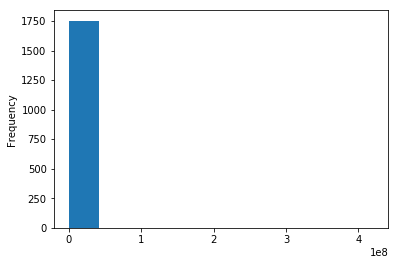

In [25]:
# Plot the distribution of salary
jobs_with_salary['salary_num'].plot(kind='hist')

In [26]:
# The plot above looks not quite right. There are might be some outliers

# First check the outlier at the high end
high_salary_outlier = jobs_with_salary[jobs_with_salary['salary_num'] > 300000]
high_salary_outlier

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,salary,subclassification,recruiter_rating,description,salary_num
107,40868803,Software Engineer - Python,Sirius Technology Sydney part of Sirius People...,2020-02-03,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",$100000 - $1200000 per annum,Developers/Programmers,NaN,A globally successful Start-up backed with hug...,650000.0
137,40858790,Data Scientist,Bluefin Resources Pty Limited,2020-01-31,Sydney,Full Time,Banking & Financial Services,"CBD, Inner West & Eastern Suburbs",$130000.00 - $1420000.00 p.a. including super,Analysis & Reporting,NaN,Lead Data ScientistThe CompanyA major Australi...,775000.0
173,40762164,Lead Data Scientist,Bluefin Resources Pty Limited,2020-01-17,Sydney,Full Time,Banking & Financial Services,"CBD, Inner West & Eastern Suburbs",$135000.00 - $1480000.00 p.a. + including super,Analysis & Reporting,NaN,Lead Data Scientist9 Months Fixed Term Contrac...,807500.0
190,40742971,Data Solutions Consultant - up to $800pd,Correlate Resources,2020-01-15,Sydney,Contract/Temp,Consulting & Strategy,"CBD, Inner West & Eastern Suburbs",Up to 800 per hour,Analysts,NaN,Our client's is a growing rapidly and offering...,1428800.0
505,40905881,Underground Geotechnical Engineer - FIFO QLD,Marble,2020-02-06,Brisbane,Full Time,"Mining, Resources & Energy",NaN,Attractive package - Call Josh on 0420462066,Mining - Exploration & Geoscience,NaN,The Company A major mining principal with a br...,420462066.0
1040,40848071,Principal Advisor - Natural Resource Management,K2 Recruitment & Consulting P/L,2020-01-30,Sydney,Contract/Temp,Government & Defence,"CBD, Inner West & Eastern Suburbs",$90 to $110 per hour + super($750 to $900 p/d),Government - State,NaN,​​​The Company Our client is a highly valued c...,826025.0
1356,40926159,Business Analyst,Rubix Solutions Pty Ltd,2020-02-10,Sydney,Contract/Temp,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",1500 Daily,Business/Systems Analysts,NaN,Rubix Solutions is seeking an experienced Busi...,352500.0
2011,40869509,MS BI Contractor - 3/6 Months,FutureYou,2020-02-03,Melbourne,Contract/Temp,Information & Communication Technology,NaN,$600 - $700 per hour,Consultants,NaN,I am currently recruiting for a MS BI Contract...,1160900.0
2381,40841001,Recruitment Consultant || Talent Scout,Sanctuary Recruitment Pty Ltd,2020-01-29,Sydney,Full Time,Human Resources & Recruitment,NaN,Call Mitch on 02 8459 8110,Recruitment - Agency,NaN,We are a healthcare recruitment company based ...,1946857.5
2455,40887942,Room Leader,YMCA,2020-02-04,Melbourne,Full Time,Education & Training,Western Suburbs,Children's Services Award 2010 Level 4.1 - 4.3,Childcare & Outside School Hours Care,3.3,"At the Y, we believe in the power of inspired ...",472350.0


In [27]:
# Most of the high end outliers caused by typo in the metadata. As there are only 12 outliers, I am going to just 
# manually correct the data.

jobs_with_salary.iloc[107, 12] = 110000
jobs_with_salary.iloc[137, 12] = 136000
jobs_with_salary.iloc[173, 12] = 141500
jobs_with_salary.iloc[190, 12] = 800*235
jobs_with_salary.iloc[505, 12] = np.nan
jobs_with_salary.iloc[1040, 12] = 825*235
jobs_with_salary.iloc[2011, 12] = 650*235
jobs_with_salary.iloc[2381, 12] = np.nan
jobs_with_salary.iloc[2455, 12] = np.nan
jobs_with_salary.iloc[2522, 12] = np.nan
jobs_with_salary.iloc[2558, 12] = 150000

In [28]:
# Remove the rows that 'salary_num' were corrected as nan
jobs_with_salary.drop(jobs_with_salary.index[[505,2381,2455,2522]], axis=0, inplace=True)
jobs_with_salary.shape

(2592, 13)

In [29]:
# Reset the index again
jobs_with_salary.reset_index(drop=True, inplace=True)

In [30]:
# Check if the issue has been fixed
high_outlier_remained = jobs_with_salary[jobs_with_salary['salary_num'] > 300000]
high_outlier_remained

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,salary,subclassification,recruiter_rating,description,salary_num
1355,40926159,Business Analyst,Rubix Solutions Pty Ltd,2020-02-10,Sydney,Contract/Temp,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",1500 Daily,Business/Systems Analysts,NaN,Rubix Solutions is seeking an experienced Busi...,352500.0


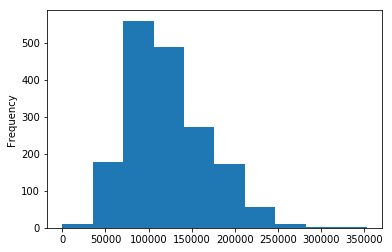

In [31]:
# plot the distribution again after the high end outlier issue solved
jobs_with_salary['salary_num'].plot.hist()

In [32]:
# The distribution looks much more reasonable now. However the salary < 50000 looks not quite right for a data science
# job in Australia. Therefore I will have a further look at the low end of the salary data.
low_pay = jobs_with_salary[jobs_with_salary['salary_num'] < 50000]
low_pay

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,salary,subclassification,recruiter_rating,description,salary_num
345,40863473,ASAP Start - North Finchley - Customer Service...,Australasian Recruitment Company,2020-01-31,Other,Full Time,Call Centre & Customer Service,NaN,Up to £25k p.a.,Other,NaN,THE ROLE: Interested in working for a leading ...,25000.00
381,40830280,IT Support Engineer - Oncall Casual,PRO IT PTY LTD,2020-01-28,Sydney,Casual/Vacation,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",$25 - $29.99 per hour,Networks & Systems Administration,NaN,"Casual On-call/Shift Support Engineer, potenti...",49106.07
415,40858242,B2B Sales Assistant,WINDTECH Consultants Pty Ltd,2020-01-31,Sydney,Full Time,Sales,Southern Suburbs & Sutherland Shire,"$40,000 - $49,999",New Business Development,NaN,About the business Windtech Consultants are a...,44999.50
530,40765276,Solution Integration Architect - Perth,The Onset,2020-01-17,Perth,Full Time,Information & Communication Technology,"CBD, Inner & Western Suburbs",10k plus super,Architects,NaN,Solutions Integration Architect\nAre you a tal...,10000.00
1048,40772665,Administration Officer- Permanent,Fenner Dunlop,2020-01-19,Mackay & Coalfields,Full Time,Administration & Office Support,NaN,$27-28 per hour + Super,Administrative Assistants,3.2,"About Us: Fenner Dunlop Australia Pty Ltd, p...",49115.00
1051,40815735,Administration Assistant,Advanced Drive Group,2020-01-24,Gold Coast,Full Time,Administration & Office Support,NaN,"$40,000 - $59,999",Administrative Assistants,NaN,Advanced Drive Group (ADG) is an Australia...,49999.50
1065,40844148,Customer Support Specialist,RateSetter,2020-01-29,Adelaide,Full Time,Call Centre & Customer Service,NaN,"$40,000 - $59,999 Plus great learning opportunity",Customer Service - Call Centre,NaN,We are RateSetter One of the world's largest p...,49999.50
1086,40783771,Site Administrator,WorkPac - Kalgoorlie,2020-01-21,Other,Contract/Temp,Administration & Office Support,NaN,$25 - $30 per hour,Administrative Assistants,NaN,Attractive hourly rates Provide site adminis...,49115.00
1120,40722934,Warehouse Picker/Packer,Aglo Systems,2020-01-13,Melbourne,Full Time,"Manufacturing, Transport & Logistics",Bayside & South Eastern Suburbs,$27.00 per hour,"Warehousing, Storage & Distribution",4.0,Aglo is an Australian owned premium commercial...,48222.00
1244,40911593,PhD Scholarship,QIMR Berghofer Medical Research Institute,2020-02-07,Brisbane,Full Time,Government & Defence,CBD & Inner Suburbs,"PhD Stipend ($28,092 pa, 2020 rate)",Government - State,NaN,About QIMR Berghofer:QIMR Berghofer is a world...,28092.00


In [33]:
jobs_with_salary.shape

(2592, 13)

In [34]:
# Most of the low paid jobs above are not data related jobs.

# Pick up those data related jobs, correct the salary when necessary
jobs_with_salary.iloc[1391,12] = 47500
jobs_with_salary.iloc[1801,12] = 90000
jobs_with_salary.iloc[2417,12] = 32760/3*5

# Remove jobs that are not related to data
remove_index = [ 345,  381,  415,  530, 1048, 1051, 1065, 1086, 1120, 1244, 1245, 1936, 2058, 
                2133, 2152, 2211, 2273, 2411, 2468, 2475, 2500, 2522, 2527, 2562]
jobs_with_salary.drop(jobs_with_salary.index[remove_index], axis=0, inplace=True)
jobs_with_salary.shape

(2568, 13)

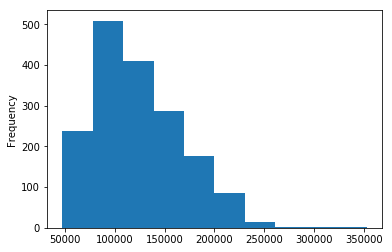

In [35]:
# plot the distribution again after the low end outlier issue solved
jobs_with_salary['salary_num'].plot.hist()

In [36]:
# Subset the dataframe, exclued the rows that has nan values in 'salary_num' column
jobs_with_salary_cleaned= jobs_with_salary[jobs_with_salary['salary_num'].notnull()].copy()
jobs_with_salary_cleaned.shape

(1725, 13)

In [37]:
# Drop the original object type 'salary' column
jobs_with_salary_cleaned.drop('salary', axis=1, inplace=True)
jobs_with_salary_cleaned.shape

(1725, 12)

In [38]:
# Reset the index again
jobs_with_salary.reset_index(drop=True, inplace=True)
jobs_with_salary_cleaned.reset_index(drop=True, inplace=True)

In [39]:
# Save the cleaned dateset for further usage
jobs_with_salary_cleaned.to_csv('./data/jobs_with_salary_cleaned.csv')

## EDA

In [40]:
jobs_with_salary_cleaned.shape

(1725, 12)

In [41]:
jobs_with_salary_cleaned.head()

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,subclassification,recruiter_rating,description,salary_num
0,40925581,Data Engineer,The Onset,2020-02-10,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",Engineering - Software,NaN,It's your call whether to garner support from ...,170000.0
1,40924597,Data Engineer,Precision Sourcing,2020-02-10,Sydney,Full Time,Information & Communication Technology,NaN,Developers/Programmers,NaN,About the business This is an amazing time to...,115000.0
2,40912608,Data Engineer,Hays Information Technology,2020-02-07,Sydney,Full Time,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",Developers/Programmers,NaN,Data Engineer Your new company A national ban...,110000.0
3,40872824,Senior Data Engineer (Spark/Python/PySpark) | ...,Naviro,2020-02-03,Sydney,Contract/Temp,Information & Communication Technology,"CBD, Inner West & Eastern Suburbs",Engineering - Software,NaN,Unique opportunity for a Senior Data Engineer ...,200000.0
4,40890583,Data Engineer,eHealth NSW,2020-02-05,Sydney,Full Time,Information & Communication Technology,North Shore & Northern Beaches,Engineering - Software,3.1,Partnering with health agencies and industry t...,121696.5


In [42]:
jobs_with_salary_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
job_id               1725 non-null int64
job_title            1725 non-null object
recruiter            1725 non-null object
posted_date          1725 non-null datetime64[ns]
city                 1725 non-null object
job_type             1725 non-null object
classification       1725 non-null object
suburb               1251 non-null object
subclassification    1725 non-null object
recruiter_rating     274 non-null float64
description          1725 non-null object
salary_num           1725 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 161.8+ KB


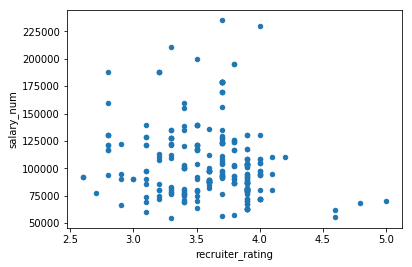

In [43]:
# have a look the relation between recruiter_rating and salary_num (Is it true that a recruiter with higher rating
# normally offer higer salary?)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

jobs_with_salary_cleaned.plot(kind='scatter', x='recruiter_rating', y='salary_num')

In [44]:
# The scatter plot shows there is no obvious relationship between these two columns.
# Have a look at the correlationship
jobs_with_salary_cleaned.corr()

,job_id,recruiter_rating,salary_num
job_id,1.000000,-0.052863,-0.025324
recruiter_rating,-0.052863,1.000000,-0.182179
salary_num,-0.025324,-0.182179,1.000000


In [45]:
# As there are only a few numerical columns, the correlation matrix doesn't tell much

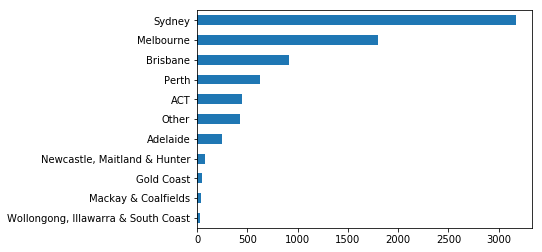

In [46]:
# The job posting distribution by city

df_jobs['city'].value_counts().sort_values(ascending=True).plot(kind='barh')

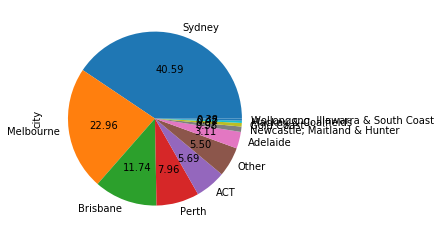

In [47]:
# The job posting distribution by city pie chart (the full job postings dataset)

df_jobs['city'].value_counts().plot(kind='pie', autopct='%.2f')

In [48]:
# What are the mean salary for each city?
jobs_with_salary_cleaned.groupby('city').salary_num.mean().sort_values(ascending=False)

city
Newcastle, Maitland & Hunter           144160.153846
Sydney                                 131288.748679
ACT                                    128336.650426
Melbourne                              116692.239903
Brisbane                               113281.052063
Mackay & Coalfields                    106383.767500
Perth                                  105774.627660
Other                                  105498.228268
Adelaide                               102335.500000
Gold Coast                              85220.576000
Wollongong, Illawarra & South Coast     82524.625000
Name: salary_num, dtype: float64

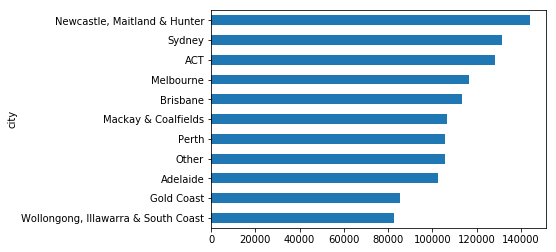

In [49]:
# What are the mean salary for each city?
jobs_with_salary_cleaned.groupby('city').salary_num.mean().sort_values(ascending=True).plot(kind='barh')

In [50]:
# Have a look at why mean salary is so high in Newcastle, Maitland & Hunter 
jobs_with_salary_cleaned[jobs_with_salary_cleaned['city']=='Newcastle, Maitland & Hunter']

,job_id,job_title,recruiter,posted_date,city,job_type,classification,suburb,subclassification,recruiter_rating,description,salary_num
99,40857241,Database Engineer,Lake Macquarie City Council,2020-01-31,"Newcastle, Maitland & Hunter",Full Time,Information & Communication Technology,NaN,Database Development & Administration,NaN,"Permanent, Full TimeCouncil is committed to ...",100021.5
256,40799659,National Underground Sales Manager - Shearer D...,Salexo Consulting,2020-01-22,"Newcastle, Maitland & Hunter",Full Time,Sales,NaN,Management,NaN,International Equipment Manufacturer has been ...,169999.5
361,40857242,Database Engineer,Lake Macquarie City Council,2020-01-31,"Newcastle, Maitland & Hunter",Full Time,Government & Defence,NaN,Government - Local,NaN,"Permanent, Full TimeCouncil is committed to ...",100021.5
376,40868971,Senior Software Engineer,JM Recruiting,2020-02-03,"Newcastle, Maitland & Hunter",Full Time,Information & Communication Technology,NaN,Developers/Programmers,NaN,There’s a reason more people resign from their...,140000.0
388,40850031,Project Engineer,Construct Consulting Group,2020-01-30,"Newcastle, Maitland & Hunter",Full Time,Engineering,NaN,Mechanical Engineering,NaN,The Company I have a fantastic opportunity to ...,150000.0
419,40850974,Site Manager,Construct Consulting Group,2020-01-30,"Newcastle, Maitland & Hunter",Full Time,Engineering,NaN,Project Management,NaN,The Company I have a fantastic opportunity to ...,140000.0
636,40903429,"Cyber Security, Risk & Governance Manager",Peoplebank Australia NSW,2020-02-06,"Newcastle, Maitland & Hunter",Full Time,Information & Communication Technology,NaN,Security,NaN,"The CompanyThis enterprise-sized, rapidly gro...",125000.0
656,40831116,Registered Surveyor - NSW Hunter Valley Office,Hudson - Engineering,2020-01-28,"Newcastle, Maitland & Hunter",Full Time,Construction,NaN,Surveying,NaN,About the BusinessHaving been operating for ov...,150000.0
1097,40877664,Business Analyst,Australian Taxation Office,2020-02-03,"Newcastle, Maitland & Hunter",Full Time,Consulting & Strategy,NaN,Analysts,3.6,"About us At the ATO, you’ll do work you can’t ...",89039.5
1507,40883662,"Property, Development and Project Manager",ASR Recruitment,2020-02-04,"Newcastle, Maitland & Hunter",Full Time,Construction,NaN,Project Management,NaN,The OpportunityThis role is as interesting as ...,120000.0


In [51]:
# Because only 13 job postings in Newcastle, Maitland & Hunter, the mean salary might not accurately reflect the 
# average salary in the market.

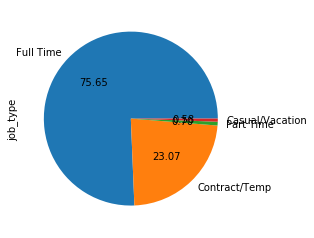

In [52]:
# The job postings distribution by job type pie chart

jobs_with_salary_cleaned['job_type'].value_counts().plot(kind='pie', autopct='%.2f')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

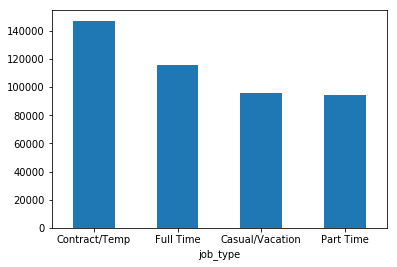

In [53]:
# What are the mean salary for each job type?
ax = plt.subplots(figsize=(6,4))
ax = jobs_with_salary_cleaned.groupby('job_type').salary_num.mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)

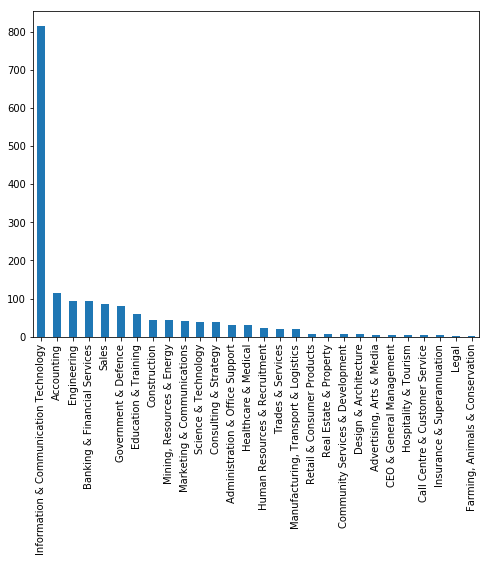

In [54]:
# The job posting distribution by classification

jobs_with_salary_cleaned['classification'].value_counts().plot(kind='bar', figsize=(8,6))

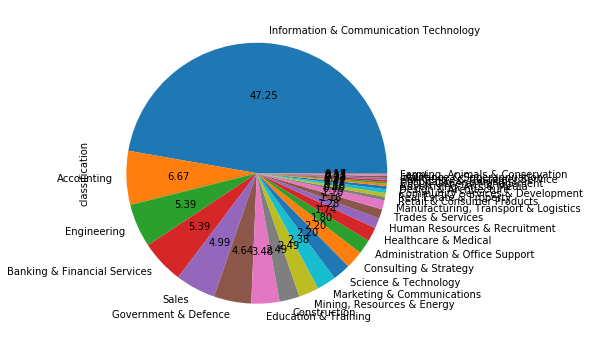

In [57]:
# The job posting distribution by classification pie chart

jobs_with_salary_cleaned['classification'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8,6))

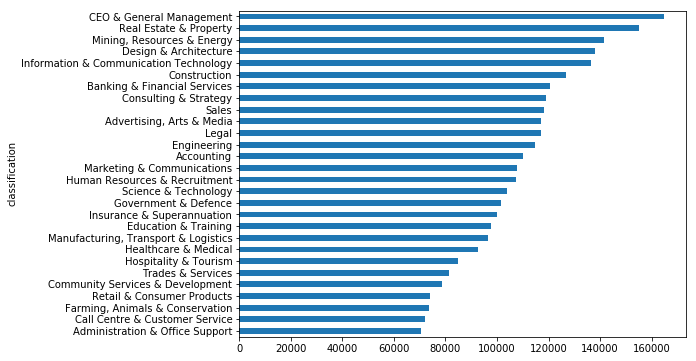

In [56]:
# What are the mean salary for each classification?
jobs_with_salary_cleaned.groupby('classification').salary_num.mean().sort_values(ascending=True).plot(kind='barh', 
                                                                                                     figsize=(8,6))